In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import statsmodels.formula.api as smf
from sklearn import datasets
import matplotlib.pyplot as plt
# !pip install seaborn
# Great analysis done by: https://www.youtube.com/watch?v=Wqmtf9SA_kk


### Doubling Data

In [7]:
dbs = datasets.load_diabetes()
df = pd.DataFrame(data=dbs.data, columns=dbs.feature_names)
df['target'] = dbs.target

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


<Axes: >

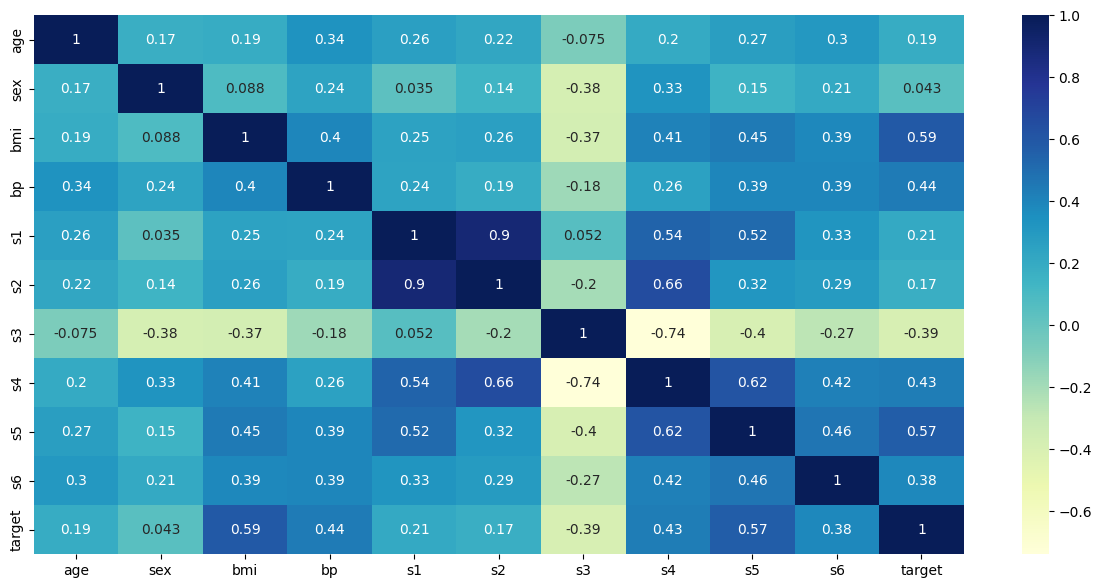

In [11]:
# df.describe()
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [13]:
formula = 'target ~ sex + bmi + bp + s2 + s3 + s5'

model1 = smf.ols(formula, data = df)
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     76.11
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           1.01e-64
Time:                        09:49:39   Log-Likelihood:                -2388.5
No. Observations:                 442   AIC:                             4791.
Df Residuals:                     435   BIC:                             4820.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.579     58.993      0.000     147.065     157.202
sex         -227.0668     60.522     -3.752      0.000    -346.018    -108.116
bmi          537.6865     65.620      8.194      0.000     408.714     666.659
bp           327.9656     62.937      5.211      0.000     204.267     451.665
s2          -102.8204     58.063     -1.771      0.077    -216.940      11.299
s3          -291.0961     65.495     -4.445      0.000    -419.822    -162.370
s5           497.9473     66.871      7.446      0.000     366.516     629.378
==============================================================================
Omnibus:                        1.439   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                1.395
Skew:                           0.048   Prob(JB):                        0.498
Kurtosis:                       2.742   Cond. No.                         33.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model2 = smf.ols(formula, data = pd.concat([df,df]))
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     153.4
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          5.26e-133
Time:                        09:50:02   Log-Likelihood:                -4777.1
No. Observations:                 884   AIC:                             9568.
Df Residuals:                     877   BIC:                             9602.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      1.816     83.764      0.000     148.569     155.698
sex         -227.0668     42.624     -5.327      0.000    -310.724    -143.410
bmi          537.6865     46.215     11.634      0.000     446.982     628.391
bp           327.9656     44.325      7.399      0.000     240.969     414.962
s2          -102.8204     40.893     -2.514      0.012    -183.079     -22.561
s3          -291.0961     46.127     -6.311      0.000    -381.628    -200.564
s5           497.9473     47.096     10.573      0.000     405.513     590.381
==============================================================================
Omnibus:                        3.216   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.200   Jarque-Bera (JB):                2.789
Skew:                           0.048   Prob(JB):                        0.248
Kurtosis:                       2.742   Cond. No.                         33.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Test multicollinearity with VIF

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
{df.columns[i]: variance_inflation_factor(df.values, i) for i in range(1, df.shape[1])}

{'sex': 1.283074674277464,
 'bmi': 1.5329489613462812,
 'bp': 1.4685826702485074,
 's1': 59.257107996664125,
 's2': 39.21314395204627,
 's3': 15.403044282517873,
 's4': 8.893714015565372,
 's5': 10.125072508498388,
 's6': 1.485020502825962,
 'target': 1.1180646790846307}

In [18]:
formula

'target ~ sex + bmi + bp + s2 + s3 + s5'